## ASSIGNMENT_USA_ANALYSIS_PART1

In [101]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns



#### IMPORTING FLIGHT DATA

In [100]:

Flight_Data = pd.read_excel(r"C:\Users\Avishaek\Downloads\Flight Data (1).xlsx")
df_flight_data= Flight_Data

In [102]:
Flight_Data.columns
Flight_Data

,Source,Source City,Source Country,Target,Target City,Target Country,Weight
0,FNC,Funchal,Portugal,PXO,Porto Santo,Portugal,9864
1,PXO,Porto Santo,Portugal,FNC,Funchal,Portugal,9864
2,AEP,Buenos Aires,Argentina,MVD,Montevideo,Uruguay,1463
3,MVD,Montevideo,Uruguay,AEP,Buenos Aires,Argentina,1463
4,AEP,Buenos Aires,Argentina,ROS,Rosario (AR),Argentina,2261
...,...,...,...,...,...,...,...
60465,PFO,Paphos,Cyprus,LCA,Larnaca,Cyprus,945
60466,ATH,Athens (GR),Greece,TIA,Tirana,Albania,128
60467,TIA,Tirana,Albania,ATH,Athens (GR),Greece,128
60468,PRN,Pristina,Yugoslavia,TIA,Tirana,Albania,208


In [103]:

Edge_List = Flight_Data[Flight_Data['Source Country'].str.contains('USA') & Flight_Data['Target Country'].str.contains('USA')]

#### Merging Of Parallel Edges (Weights) and Adding-Up their Respective weights

In [104]:

Edge_List=Flight_Data.groupby(['Source','Target']).sum('Weight').reset_index()

Edge_List

,Source,Target,Weight
0,AAA,PPT,384
1,AAC,ADJ,700
2,AAC,AMM,250
3,AAE,ALG,11342
4,AAE,LYS,2520
...,...,...,...
30238,ZVK,VTE,280
30239,ZWL,YNL,513
30240,ZWL,YVC,437
30241,ZYL,DAC,18465


#### Using NetworkX to create a Directed Graph

In [105]:
Graph=nx.from_pandas_edgelist(Edge_List, source= 'Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph)

Total_Nodes= Graph.nodes()
Total_Nodes= pd.DataFrame(Total_Nodes)

Nodes_United_Kingdom = pd.DataFrame(columns = ['id','label','country','Latitude','Longitude'])
Nodes_United_Kingdom['id'] = Total_Nodes
len(Graph.nodes())

3531

#### IMPORTING DATA FROM AIRPORT DATA FRAME

In [ ]:

Airport_Data= pd.read_csv(r"C:\Users\Avishaek\Downloads\Sorted Data\USA_AIRPORT_DATA.csv")

for i, row in Nodes_United_Kingdom.iterrows():
    for j, row in Airport_Data.iterrows():
        
         if Nodes_United_Kingdom.loc[i].at["id"]== Airport_Data.loc[j].at["id"]:
            Nodes_United_Kingdom.loc[i].at["label"] = Airport_Data.loc[j].at["label"] 
            Nodes_United_Kingdom.loc[i].at["country"] = Airport_Data.loc[j].at["country"]
            Nodes_United_Kingdom.loc[i].at["Latitude"] = Airport_Data.loc[j].at["Lat "]
            Nodes_United_Kingdom.loc[i].at["Longitude"] = Airport_Data.loc[j].at["Lon"]
            break


In [106]:
Nodes_United_Kingdom.to_csv("C:\\Users\\Avishaek\\Downloads\\Sorted Data\\Nodes_United_Kingdom.csv")

nx. info(Graph)

Graph.nodes()

C:\Users\Avishaek\AppData\Local\Temp\ipykernel_26524\3821254896.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx. info(Graph)


NodeView(('AAA', 'PPT', 'AAC', 'ADJ', 'AMM', 'AAE', 'ALG', 'LYS', 'MLH', 'MRS', 'NCE', 'ORN', 'ORY', 'AAL', 'AAR', 'BLL', 'CPH', 'OSL', 'RKE', 'AAM', 'JNB', 'AAN', 'ALY', 'AUH', 'CAI', 'CCJ', 'COK', 'DOH', 'MCT', 'PEW', 'AAQ', 'ARH', 'CEK', 'DME', 'EVN', 'IAR', 'KUF', 'LED', 'NJC', 'NOJ', 'NOZ', 'OVB', 'PEE', 'PES', 'SCW', 'SGC', 'SVO', 'SVX', 'TJM', 'UCT', 'UFA', 'VKO', 'NYO', 'STN', 'AAT', 'URC', 'AAX', 'PLU', 'AAY', 'GXF', 'RIY', 'SAH', 'ABA', 'NSK', 'ABD', 'IFN', 'KIH', 'THR', 'ABE', 'ALB', 'ATL', 'AVP', 'CLE', 'CLT', 'CVG', 'DTW', 'IAD', 'ORD', 'PHL', 'PIT', 'YYZ', 'ABI', 'DFW', 'ABJ', 'ACC', 'BEY', 'BJL', 'BKO', 'BOY', 'BRU', 'CDG', 'CKY', 'CMN', 'COO', 'DKR', 'FNA', 'LFW', 'LOS', 'NIM', 'OUA', 'ROB', 'ABL', 'OBU', 'OTZ', 'SHG', 'ABM', 'CNS', 'HID', 'KUG', 'MYI', 'SBR', 'SYU', 'UBB', 'ABQ', 'ALM', 'AMA', 'BWI', 'CNM', 'COS', 'CVN', 'DAL', 'DEN', 'ELP', 'FMN', 'HOU', 'IAH', 'IFP', 'LAS', 'LAX', 'LBB', 'MAF', 'MCI', 'MCO', 'MDW', 'MSP', 'OAK', 'OKC', 'PDX', 'PHX', 'ROW', 'SAN', 'SE

#### PLOTTING OF GRAPH--AIRPORT NETWORK

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

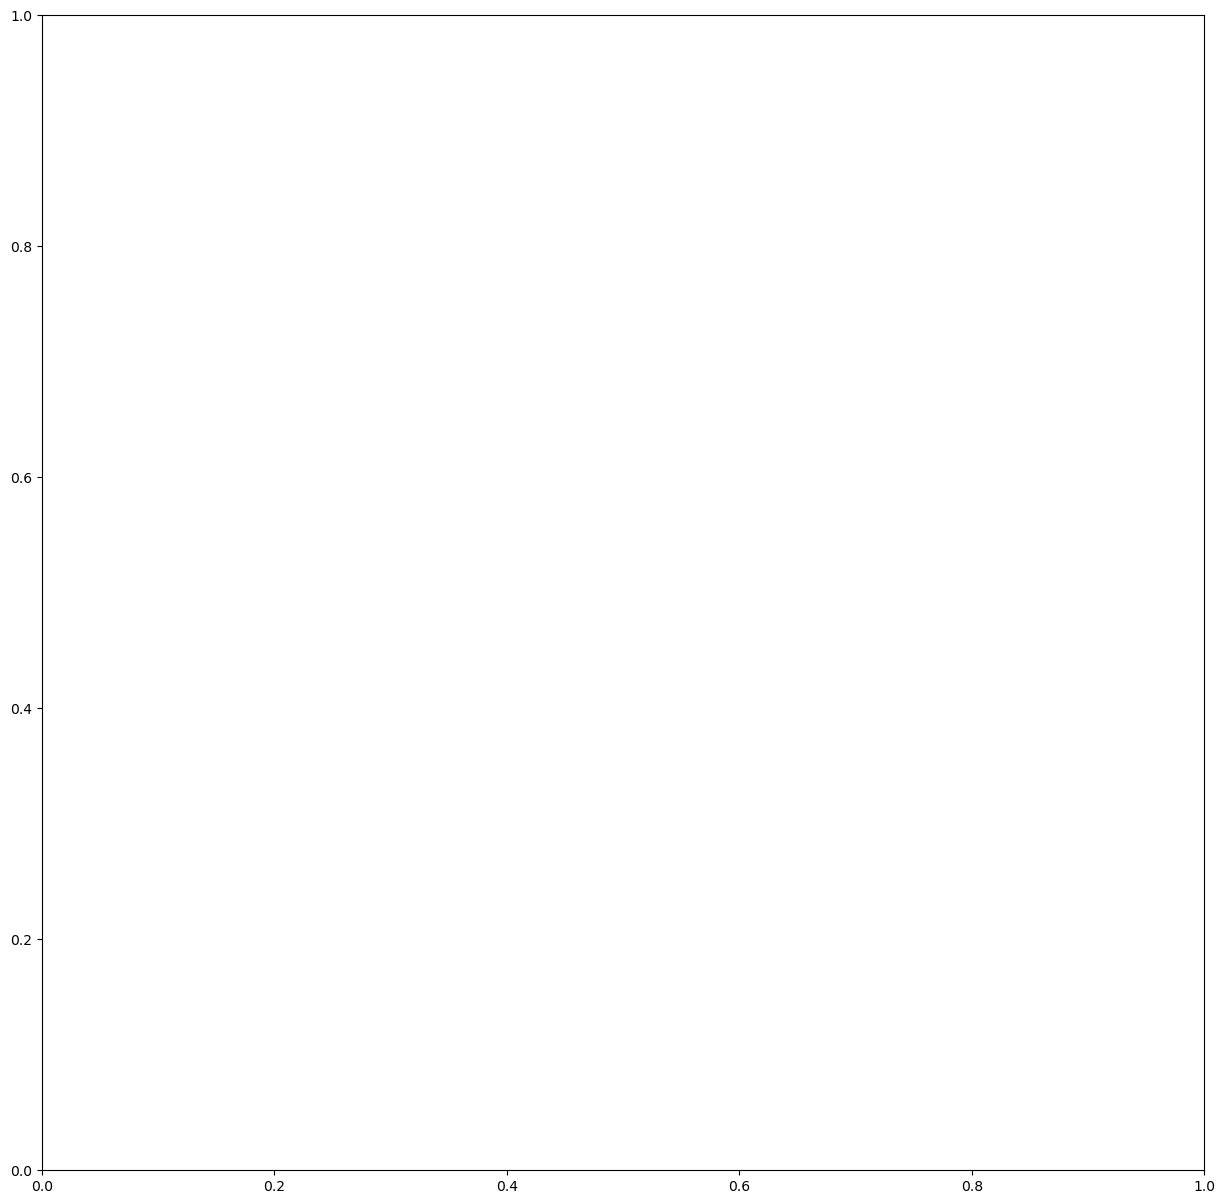

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

M = Graph.number_of_edges()
edge_colors = range(2, M + 2)
cmap = plt.cm.plasma

nx.draw_networkx(Graph, ax=ax, with_labels= True, node_size=500,  arrowstyle="->", arrowsize=10, edge_color=edge_colors, edge_cmap=cmap, node_color='c', font_size=7, alpha=0.5, width=1)
ax.set_axis_off()


#### ANALYSIS OF NETWORK

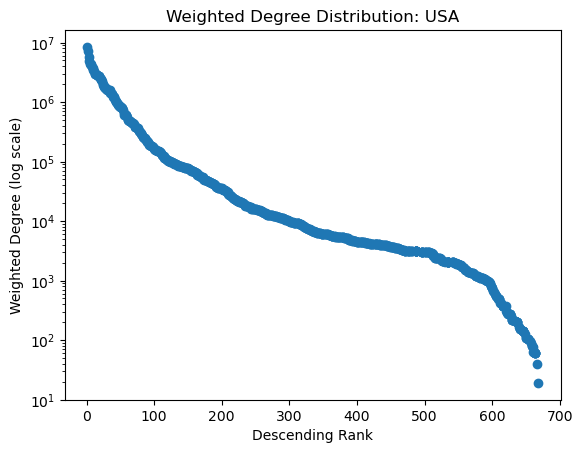

In [22]:
# DEGREE DISTRIBUTION

deg = Graph.degree(weight ='Weight')
deg_axis = sorted([d for n, d in deg], reverse=True)
rank_axis = pd.DataFrame(deg_axis).rank(ascending = False).values

plt.title('Weighted Degree Distribution: USA')
plt.xlabel("Descending Rank")
plt.ylabel( 'Weighted Degree (log scale)')
plt.xscale("linear")
plt.yscale("log")

plt.plot(rank_axis,deg_axis,'o')
plt.savefig('UK_Degree_Distribution.png')



In [21]:
##Most Influential
most_influential= nx.betweenness_centrality(Graph)
most_influential
most_influential=dict(sorted(most_influential.items(), reverse=True, key=lambda item: item[1]))
for w in sorted(most_influential, key= most_influential.get, reverse=True):
    print(w, most_influential[w])

ANC 0.36907638036010665
SEA 0.14690774655299027
MSP 0.1363101810419863
DEN 0.11387090646636666
FAI 0.10708643457580325
BET 0.08312093953023489
DFW 0.08132525631333187
ATL 0.07603096653463383
PIT 0.06393755051932454
STL 0.05296016686356135
AKN 0.04924189556873216
KTN 0.04901569485527508
IAH 0.0481583092490066
DTW 0.04287894627719628
ORD 0.042677209893787996
OME 0.0403566182890467
JNU 0.04006409919348742
PHX 0.0386066421449875
SLC 0.03477470922539651
SFO 0.034690125086296424
DLG 0.03249227488357922
LAX 0.031450177019608096
OTZ 0.03020060776767642
ANI 0.028852990921956444
CLT 0.027204175088533077
BFI 0.024237123698044122
ABQ 0.022146328273465306
BOS 0.022050456765307695
BIL 0.021348449962506632
MEM 0.019017717633099177
FRD 0.018853266646048625
PDX 0.018352364588076875
EWR 0.017973438482773045
HNL 0.017919901329252023
CVG 0.017200236592238235
PHL 0.016998789722845634
TKJ 0.016084300192246218
LKE 0.01463232347790069
MCI 0.013482557776948892
MCG 0.012207221936870368
ILI 0.011710361035698367


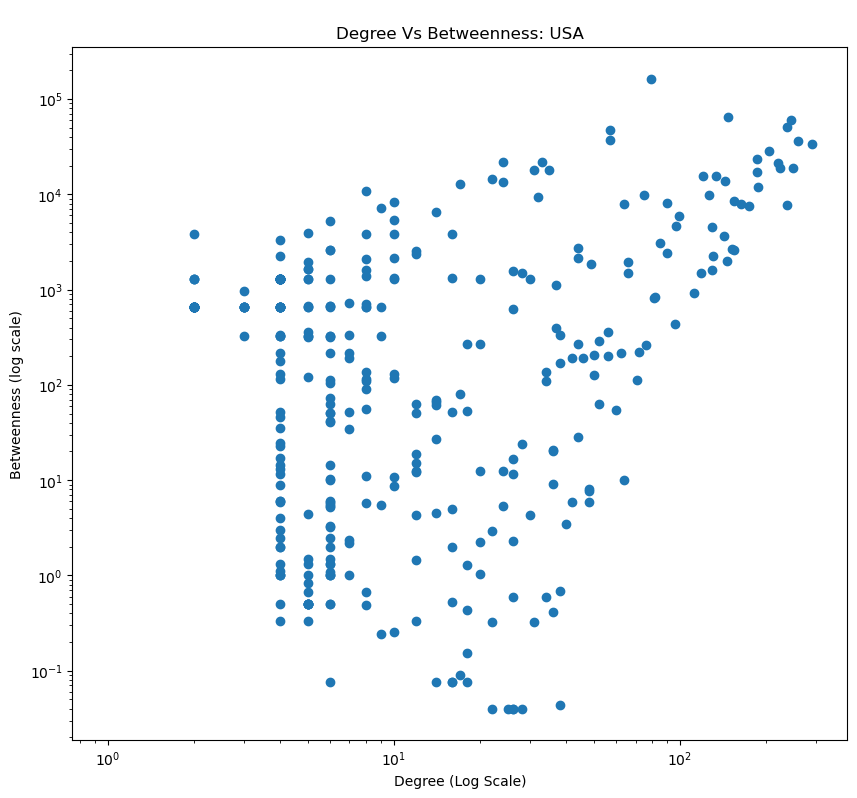

In [23]:
# DEGREE VS BETWEENNESS DISTRIBUTION


deg_axis = [val for (node, val) in sorted(Graph.degree, key=lambda x: x[0], reverse=False)]
bet = list(nx.betweenness_centrality(Graph,endpoints = False, normalized=False).items())
bet_axis = [val for (node, val) in sorted(bet, key=lambda x: x[0], reverse=False)]
plt.figure(figsize = (10,9))
plt.title('\nDegree Vs Betweenness: USA')
plt.xlabel('Degree (Log Scale)')
plt.ylabel('Betweenness (log scale)')
plt.xscale("log")
plt.yscale("log")
# pLt.savefig( 'UK_DegreeVsBetweenness. png ')
plt.plot(deg_axis ,bet_axis,'o')
plt.savefig( 'UK_DegreeVsBetweenness.png' )

In [25]:
##Association
nx.clustering(Graph)
nx.degree_assortativity_coefficient(Graph)

-0.22109973240958142

In [26]:
# ASSORTATIIVITY (DEG PEARSON CORR COEFF)
nx.degree_pearson_correlation_coefficient(Graph)

-0.22109973240958142

#### PLOTTING ASSORTATIVITY (DEG VS AVG NEIGHBOURS DEG)

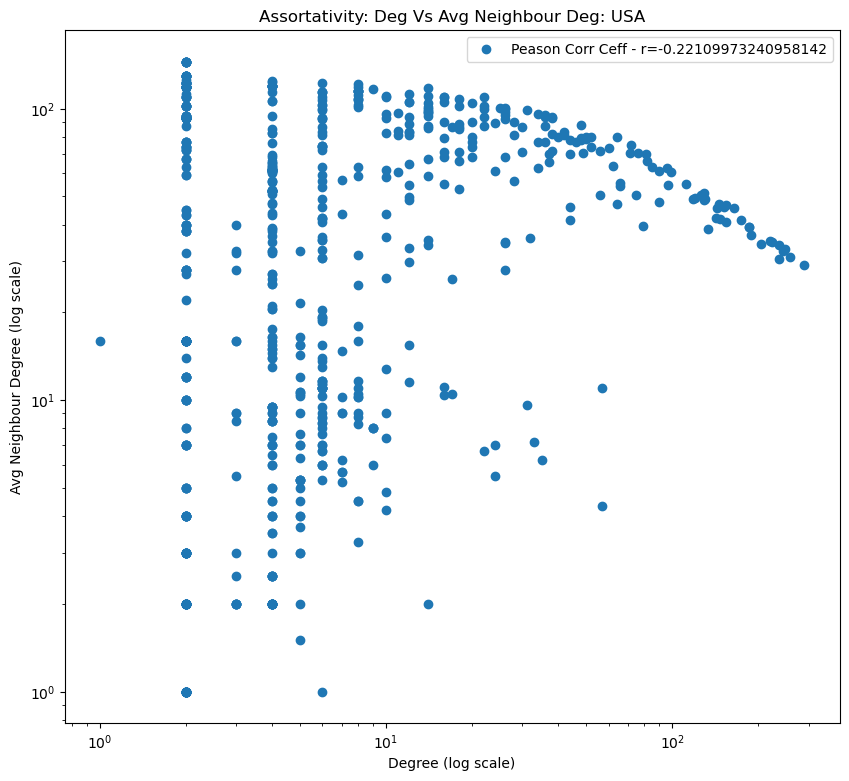

In [28]:
deg_axis = [val for (node, val) in sorted(Graph.degree, key=lambda x: x[0], reverse=False)]
avg_ngbr_deg = list(nx.average_neighbor_degree(Graph).items())
avg_ngbr_axis = [val for (node, val) in sorted(avg_ngbr_deg, key=lambda x: x[0], reverse=False)]

plt.figure(figsize = (10,9))
plt.plot(deg_axis, avg_ngbr_axis, 'o')
plt.title('Assortativity: Deg Vs Avg Neighbour Deg: USA')
plt.xlabel('Degree (log scale)')
plt.ylabel( 'Avg Neighbour Degree (log scale)')
plt.legend(['Peason Corr Ceff - r=-0.22109973240958142'])
plt.xscale("log")
plt.yscale("log")

#### LARGEST CONNECTED COMPONENT

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

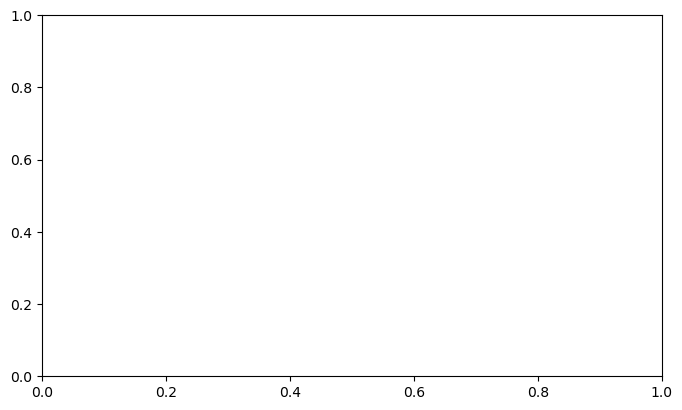

In [29]:
import numpy as np

G= Graph.to_undirected()
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=100, alpha=1)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()  # ASSIGNMENT---SO FAR MICRO PARAMETER

#### CORE COMMUNITY ANALYSIS

In [108]:
# CORE COMMUNITY SIZE
core_community = nx.k_core(Graph)
Core_community_size = len(core_community)
Core_community_size

39

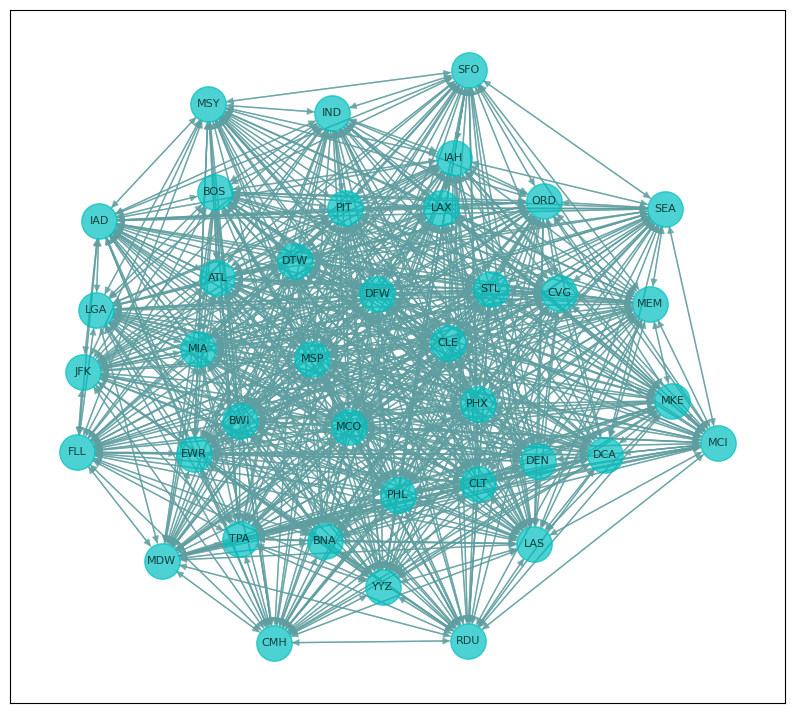

In [109]:
#CORE COMMUNITY PLOT
plt.figure(figsize = (10,9))
nx.draw_networkx(core_community,  node_size=650, edge_color='cadetblue', edge_cmap=cmap, node_color='c', font_size=8, alpha=0.7, width=1)
  
plt.show()

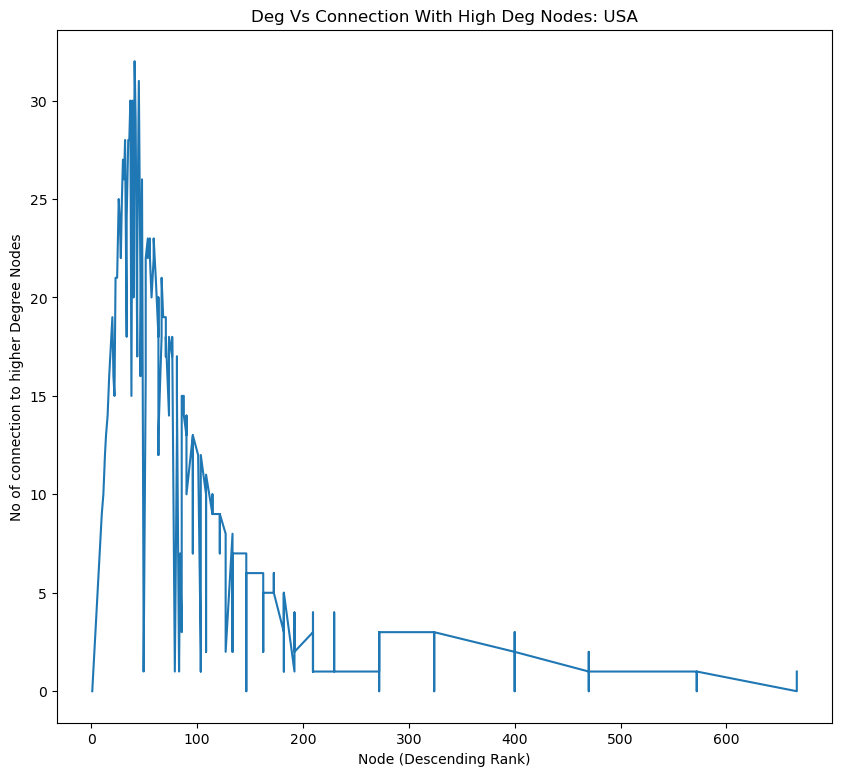

In [61]:
nodes_deg = pd.DataFrame([(node,val) for (node, val) in sorted(Graph.degree, key=lambda x: x[1], reverse=True)])    

nodes_deg = nodes_deg.rename({0: 'node',1:'degree'},axis = 1)
nodes_deg['rank'] = nodes_deg['degree'].rank(ascending=False)

hi_deg_ngbrs_list= []


for node in nodes_deg['node']:
    hi_deg_ngbrs = 0
    
    for n in Graph.neighbors(node):
         if nodes_deg[nodes_deg['node']== n].iloc[0]['degree'] > nodes_deg[nodes_deg['node']== node].iloc[0]['degree']:
            hi_deg_ngbrs+= 1
    
    hi_deg_ngbrs_list.append(hi_deg_ngbrs)
    

    
deg = sorted([d for n, d in Graph.degree], reverse=True)
deg_rank_axis = pd.DataFrame(deg).rank(ascending = False).values.tolist()

hi_deg_ngbrs_axis = hi_deg_ngbrs_list

plt.figure(figsize = (10,9))
plt.plot(deg_rank_axis,hi_deg_ngbrs_axis)
plt.title('Deg Vs Connection With High Deg Nodes: USA')
plt.xlabel('Node (Descending Rank)')
plt.ylabel('No of connection to higher Degree Nodes')
plt.xscale("linear")
plt.yscale("linear")



In [62]:
density = nx.density(Graph)
print("Network density:", density)

Network density: 0.013234373804088947


In [63]:
# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

In [64]:
# compute centrality
centrality = nx.betweenness_centrality(G, k=2, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(G)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

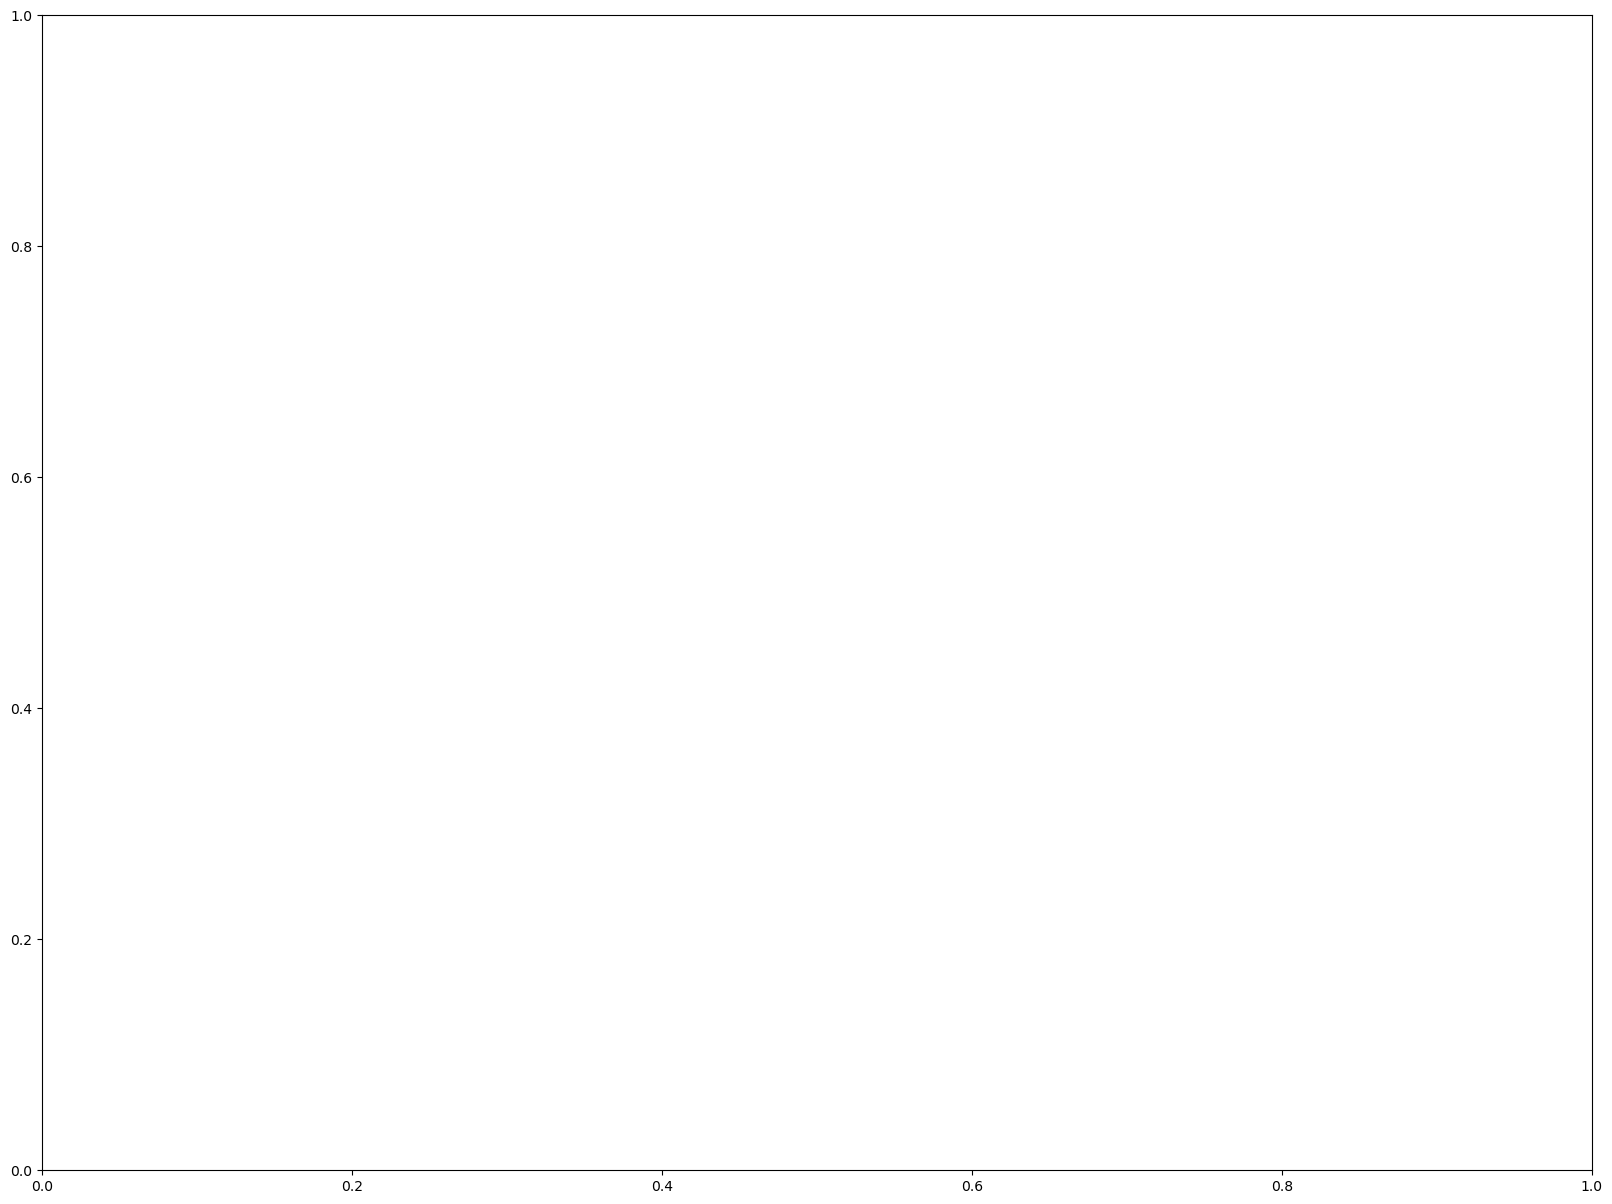

In [65]:
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G, k=0.15, seed=4572321)
node_color = [community_index[n] for n in G]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx( G, pos=pos, with_labels=True, node_color=node_color, node_size=node_size, edge_color="c", alpha=0.4,)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("FLIGHT NETWORK USA", font)
# Change font color for legend
font["color"] = "r"

ax.text( 0.80, 0.10, "node color = community structure", horizontalalignment="center", transform=ax.transAxes, fontdict=font,)
ax.text( 0.80, 0.06, "node size = betweeness centrality", horizontalalignment="center", transform=ax.transAxes, fontdict=font,)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()                     